In [1]:
# importing all necessary packages/Libraries:
import warnings 
warnings.simplefilter('ignore')
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [13]:
# Now we can read the File by using pandas liberabry:
Headers = ["W","R","AB", "H","2B","3B","HR","BB", "SO","SB","RA","ER","ERA","CG","SHO","SV","E"]
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv", names = Headers)

In [14]:
df.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
1,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
2,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
3,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
4,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101


In [15]:
df.shape


(31, 17)

In [16]:
df.isnull().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

To describe the statistics of the database we have:


In [17]:
df.describe()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
unique,25,29,30,30,23,24,28,30,30,28,31,31,31,10,13,21,22
top,68,696,5485,1363,272,27,136,478,1150,69,RA,ER,ERA,1,12,35,86
freq,3,2,2,2,3,3,2,2,2,3,1,1,1,7,7,4,3


R: Runs,

AB: At Bats

H: Hits

2B: Doubles

3B: Triples

HR: Homeruns

BB: Walks

SO: Strikeouts

SB: Stolen Bases

RA: Runs Allowed

ER: Earned Runs

ERA: Earned Run Average (ERA)

CG: Shutouts

SV: Saves,

SV: Complete Games

E: Errors

W: Win

<Axes: >

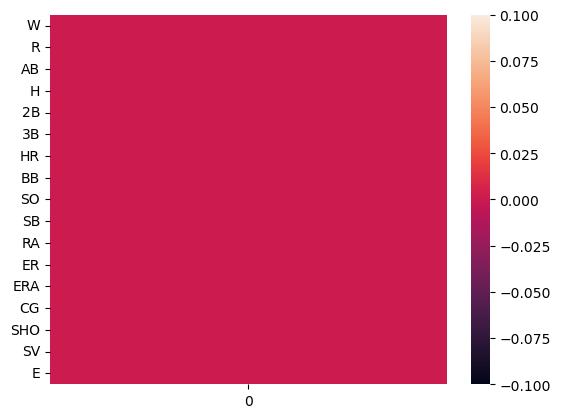

In [18]:
sns.heatmap(df.isnull().sum().to_frame())


# Checking outlies through Z-score


In [19]:
from scipy import stats

z = abs(stats.zscore(df))

#np.where(z > 3)

df = df[(z < 3).all(axis=1)]

#df.shape

TypeError: unsupported operand type(s) for /: 'str' and 'int'